In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('C:\\Users\\M\\Machine_L\\data\\titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## DecisionTree알고리즘으로 생존자를 예측하는 모델을 생성하고, 평가하시오
## 생존에 가장 큰 영향을 미치는 feature를 feature_importance로 확인하시오

In [28]:
#1. 전처리
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
name 삭제 
sex 원핫
ticket 삭제
Cabin 삭제 - 널값 너무 많아
Embarked 널값만 삭제

In [29]:
df.Embarked = df.Embarked.dropna()

In [30]:
#2. X, y 설정
X = df.drop(columns = ['Survived', 'Name', 'Ticket', 'Cabin','Age'], axis = 1)
y = df.Survived

In [31]:
# 인코딩
df_ohe = pd.get_dummies(X, dtype = 'int')

In [41]:
df_ohe.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [33]:
#3. train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_ohe, y, test_size = 0.2, random_state = 2024)

In [34]:
#4. 모델학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
#5. 예측
pred = dt.predict(X_test)

In [38]:
#6. 검증
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       110
           1       0.67      0.77      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179



In [39]:
#7. feature
dt.feature_importances_

array([0.28989226, 0.08051534, 0.0117042 , 0.04400378, 0.23736184,
       0.        , 0.28799909, 0.01449393, 0.        , 0.03402956])

In [40]:
X.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

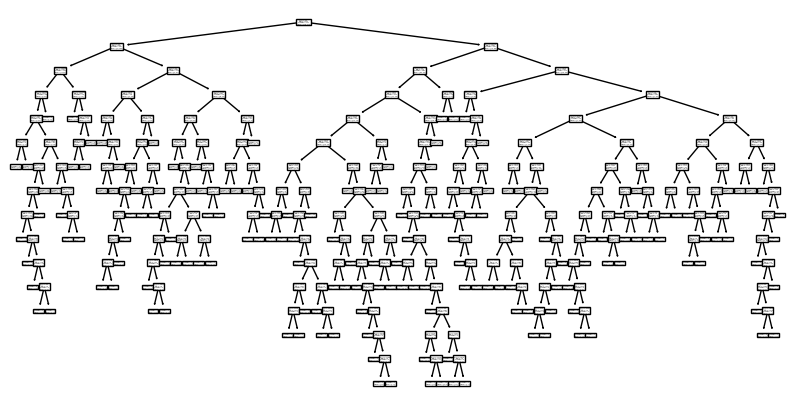

In [42]:
#7. 시각화 - 인사이트는 없음
from sklearn.tree import plot_tree
plt.figure(figsize = (10,5))
plot_tree(dt)
plt.show()

<Axes: >

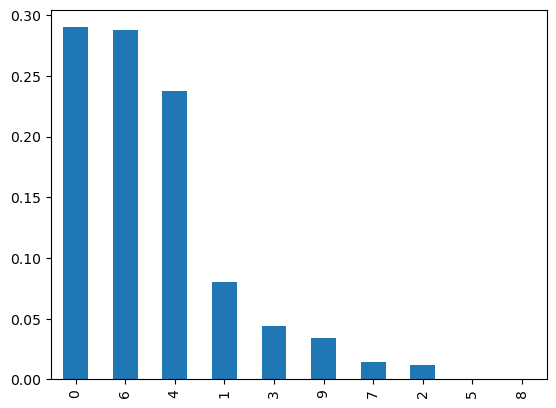

In [47]:
pd.Series(dt.feature_importances_).sort_values(ascending = False).plot(kind = 'bar')

In [48]:
#4. 모델학습
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
#5. 예측
pred = rfc.predict(X_test)

In [50]:
#6. 검증
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [52]:
#7.최적화
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# GridSearchCV 수행
grid_cv = GridSearchCV(rfc, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

#cv : 교차 검증의 fold수
#n_jobs : 병렬 처리의 개수

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8006
